### Classifying the passwords based on their strength using Random Forest classifier

#### This classification is done based on the strength of the password. I have used the columns password, length , Has_Upper, Has_SpecialChar, UpperCase_Count, LowerCase_Count, Numeric_Count, SpecialChar_Count, Password_Source, Alphabet_Count. We have used Random Forest Classifier to classify the password

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('final.csv')
data2=pd.read_csv('final.csv')
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,Passwords,length,Has_Upper,Has_Numeric,Has_SpecialChar,UpperCase_Count,LowerCase_Count,Numeric_Count,SpecialChar_Count,Alphabet_Count,Password_Source,Has_Word,Has_Name,Has_Place,Score,Password_Strength
0,@fl!pm0de@,10,0,1,1,0,6,1,3,6,Yahoo,0,0,0,5,Strong
1,pass,4,0,0,0,0,4,0,0,4,Yahoo,0,0,1,1,Weak
2,steveol,7,0,0,0,0,7,0,0,7,Yahoo,0,1,0,2,Weak
3,chotzi,6,0,0,0,0,6,0,0,6,Yahoo,0,1,0,1,Weak
4,lb2512,6,0,1,0,0,2,4,0,2,Yahoo,0,0,0,3,Medium


### Label encoding the Password_Source column 

In [2]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
data['Password_Source'] = number.fit_transform(data['Password_Source'].astype('str'))
data['Passwords'] = number.fit_transform(data['Passwords'].astype('str'))





### Dropping the unnecessary columns

In [3]:
X=data.drop(['Password_Strength','Score','Has_Word','Has_Name','Has_Place'],axis=1)

Y=data.Password_Strength

### Splitting the data set into train and test

In [4]:
# splitting the training and test data set.
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

In [5]:
print(xtrain.shape, xtest.shape)

(318137, 11) (136345, 11)


### Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf1 = RandomForestClassifier(max_depth=30)
rf1.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Accuracy scores

#### We have calculated the accuracy scores for both max_depth of 10 and 30

In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy for random forest with max depth 30: ', 100 * accuracy_score(ytest, rf1.predict(xtest)), '%')
print('Accuracy for random with max depth 10: ', 100 * accuracy_score(ytest, rf.predict(xtest)), '%')

Accuracy for random forest with max depth 30:  78.76269756866772 %
Accuracy for random with max depth 10:  69.87641644358062 %


#### The results we got is , at max_depth 10 the accuracy is 69% , but as depth increses to 30 the accuracy has improved to 78%

### Confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
aux_df = data[['Password_Strength']].drop_duplicates().sort_values('Password_Strength')



### Classification repot for random forest with max depth 10

In [11]:
print("Classification report")
print(classification_report(ytest, rf.predict(xtest)))

Classification report
              precision    recall  f1-score   support

      Medium       0.67      0.69      0.68     62731
      Strong       0.69      0.72      0.71     44239
        Weak       0.78      0.69      0.73     29375

   micro avg       0.70      0.70      0.70    136345
   macro avg       0.71      0.70      0.71    136345
weighted avg       0.70      0.70      0.70    136345



#### Here the f1-score is pretty good for all the three classes.

In [12]:
results = confusion_matrix(ytest, rf.predict(xtest))
print(results)

[[42993 14359  5379]
 [11839 32067   333]
 [ 9105    57 20213]]


### confusion matrix with maxdepth 10

Text(0.5, 24.0, 'truth')

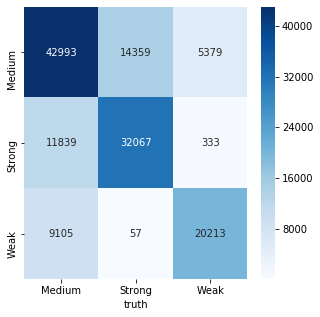

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True,fmt="d",
            xticklabels=aux_df['Password_Strength'].values, 
            yticklabels=aux_df['Password_Strength'].values,
            cmap="Blues")
plt.xlabel('Predicted')
plt.xlabel('truth')

### Classificatio report for random forest with max depth 20

In [14]:
print("Classification report")
print(classification_report(ytest, rf1.predict(xtest)))

Classification report
              precision    recall  f1-score   support

      Medium       0.78      0.77      0.78     62731
      Strong       0.77      0.79      0.78     44239
        Weak       0.83      0.82      0.83     29375

   micro avg       0.79      0.79      0.79    136345
   macro avg       0.79      0.79      0.79    136345
weighted avg       0.79      0.79      0.79    136345



#### Even here the f1-score is pretty good for all the three classes

In [15]:
results = confusion_matrix(ytest, rf1.predict(xtest))
print(results)

[[48441  9772  4518]
 [ 8987 34734   518]
 [ 4794   367 24214]]


### confusion matrix with maxdepth 20

Text(0.5, 24.0, 'truth')

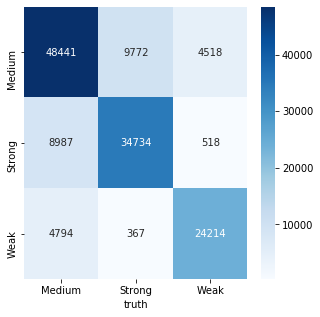

In [16]:
plt.figure(figsize=(5,5))
sns.heatmap(results,annot=True,fmt="d",
            xticklabels=aux_df['Password_Strength'].values, 
            yticklabels=aux_df['Password_Strength'].values,
            cmap="Blues")
plt.xlabel('Predicted')
plt.xlabel('truth')

### Here we observed that , with the features we used we obtained some good resluts. And as the max depth increases the performance of the model is increasing